<h2 style='color: green;'><center>EDA On Election Poll 2024</center></h2>

In [28]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [33]:
## Reading the dataset into pandas dataframe

df=pd.read_csv('election2024.csv')
df.head()

,id,sex,age,federal_district,type_of_city,knows_election_date,will_vote,candidate,television_usage,internet_usage,education,income,employment,job_type,company_type,weight1
0,07169ed8148ce047,male,18.0,north caucasian,village,named correct date,not sure,Putin,several times a week,over 4 hours a day,incomplete school education,very high,entrepreneur,NaN,farming,1.445172
1,0716a4f3354cecdd,male,23.0,north caucasian,village,named correct date,not sure,Putin,once half a year,over 4 hours a day,college,very high,work for hire,commercial organization,trade,1.445172
2,0716889b304ce79c,male,20.0,volga,city with population of less than 50k,named correct date,definitely yes,Putin,several times a week,over 4 hours a day,college,very high,work for hire,law enforcement agency,law enforcement agency,1.301691
3,07168e28b5cce563,male,22.0,northwestern,city with population of 1 million and higher,not sure or no answer,not sure,Davankov,several times a week,over 4 hours a day,college,very high,unemployed,NaN,NaN,1.538628
4,0716a563914ce549,male,21.0,southern,city with population of 1 million and higher,named correct date,definitely yes,Putin,does not watch,over 4 hours a day,bachelor degree,very high,employed student,commercial organization,"tech, programming, communications",1.967015


In [12]:
df.drop(['id'], axis=1, inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   sex                  1600 non-null   object 
 1   age                  1600 non-null   float64
 2   federal_district     1600 non-null   object 
 3   type_of_city         1600 non-null   object 
 4   knows_election_date  1600 non-null   object 
 5   will_vote            1600 non-null   object 
 6   candidate            1600 non-null   object 
 7   television_usage     1600 non-null   object 
 8   internet_usage       1600 non-null   object 
 9   education            1600 non-null   object 
 10  income               1600 non-null   object 
 11  employment           1600 non-null   object 
 12  job_type             692 non-null    object 
 13  company_type         879 non-null    object 
 14  weight1              1600 non-null   float64
dtypes: float64(2), object(13)
memory usage

- Most of columns are object type
- Total columns 15
- Numeric columns 2 (floats type)
- Object columns 13 (object type)


In [14]:
df['sex'].value_counts()

sex
female    843
male      757
Name: count, dtype: int64

In [15]:
df['will_vote'].value_counts()

will_vote
definitely yes        1062
likely yes             218
not sure               166
definitely no           86
likely no               55
struggle to answer      13
Name: count, dtype: int64

In [27]:
df['age'].describe()

count    1600.000000
mean       49.936250
std        16.901797
min        18.000000
25%        37.000000
50%        49.000000
75%        64.000000
max        90.000000
Name: age, dtype: float64

In [31]:
df['candidate'].value_counts()

candidate
Putin                 1128
struggle to answer     164
will not take part      96
Davankov                67
Kharitonov              63
Slutskiy                55
spoilt vote             27
Name: count, dtype: int64

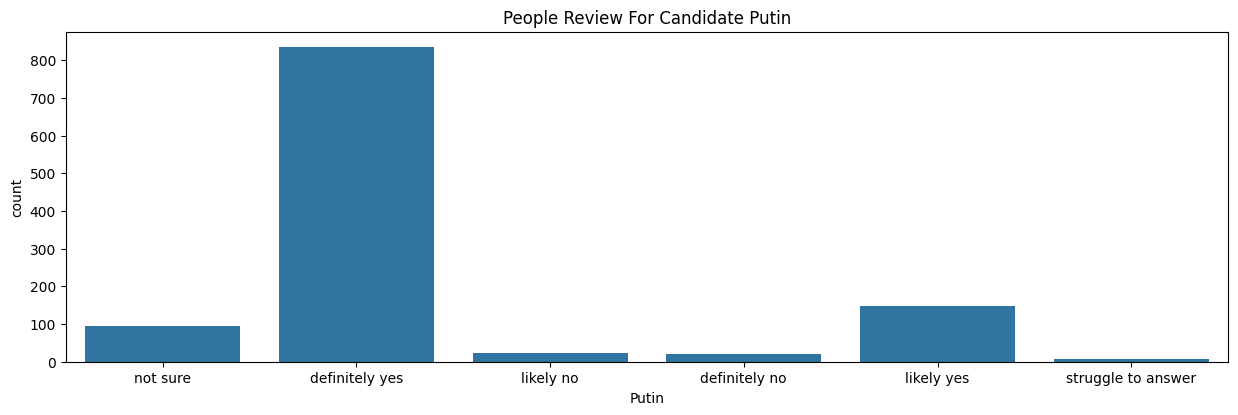

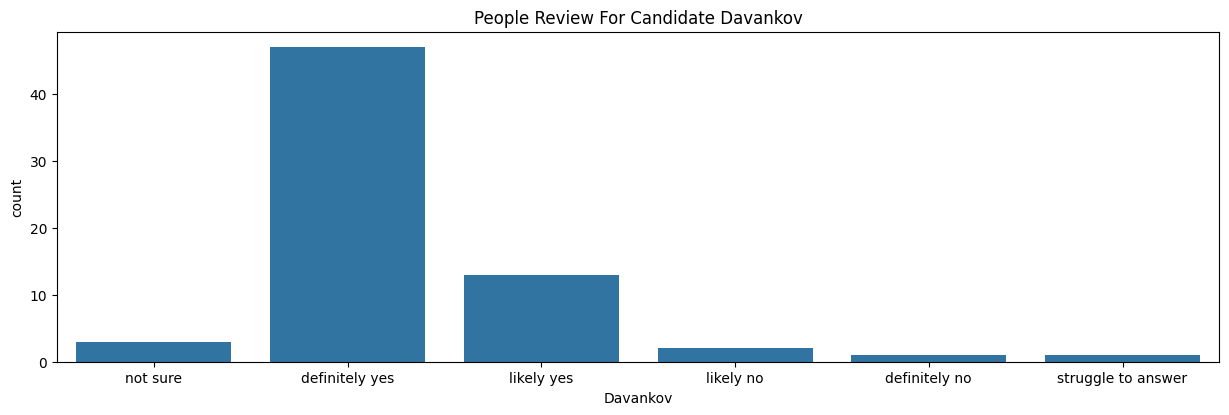

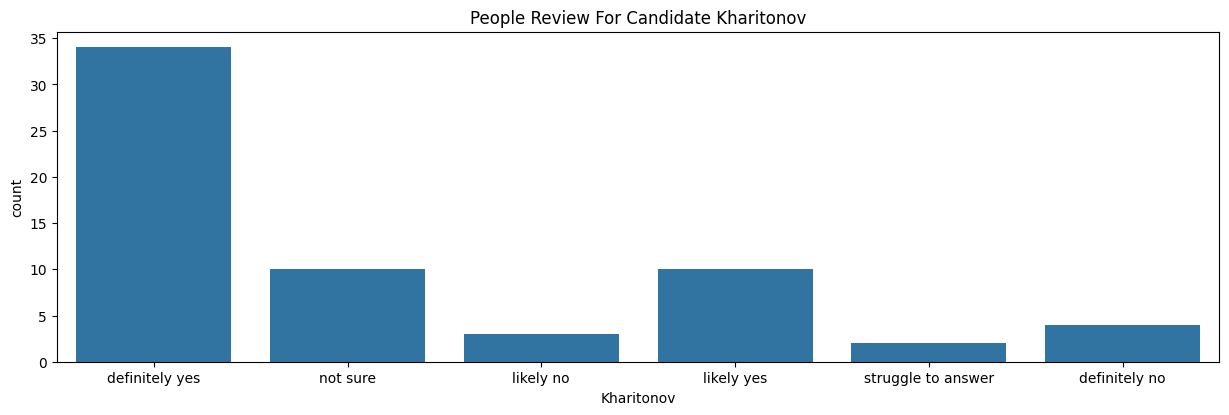

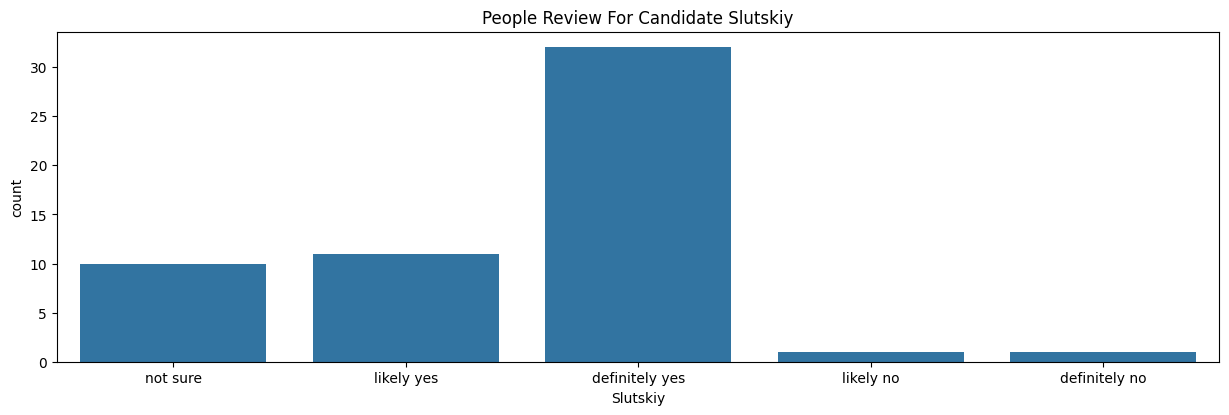

In [53]:
candidates=['Putin', 'Davankov', 'Kharitonov', 'Slutskiy']
index=1

for candidate in candidates:
    plt.figure(figsize=(15,30))
    plt.subplot(6,1,index)
    sns.categorical.countplot(data=df[df['candidate']==candidate], x=df[df['candidate']==candidate]['will_vote'])
    plt.title(f'People Review For Candidate {candidate}')
    plt.xlabel(f'{candidate}')
    plt.show()
    index +=1

From the above observation it seem most of people while vote to Putin.

# Missing at Random (MAR)
In this case, the fact that "job type" and "company type" are missing specifically because people are unemployed implies that the missingness depends on the employment status (unemployed or not) rather than on the specific job or company characteristics.

checking the unemployed people review on votting.


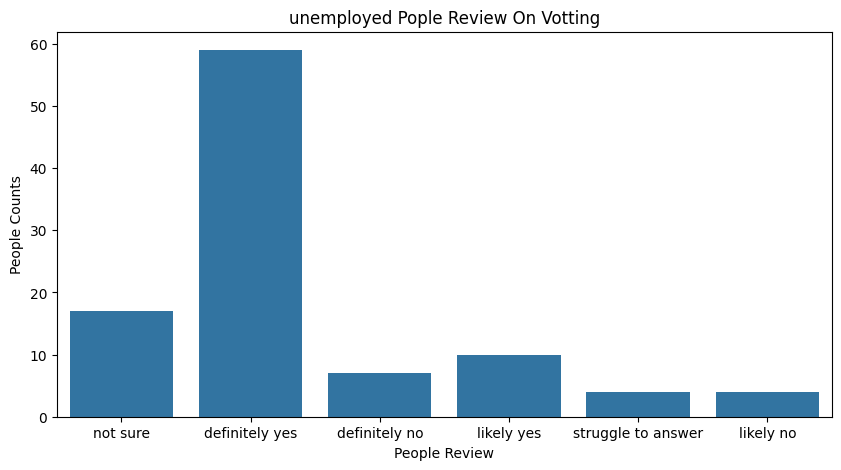

In [59]:
unemployed_pople = df[df['employment']=='unemployed']

plt.figure(figsize=(10,5))
sns.categorical.countplot(data=unemployed_pople, x=unemployed_pople['will_vote'])
plt.title('unemployed Pople Review On Votting')
plt.xlabel('People Review')
plt.ylabel('People Counts')
plt.show()